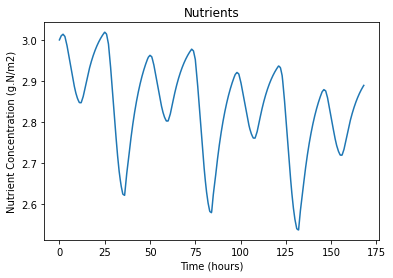

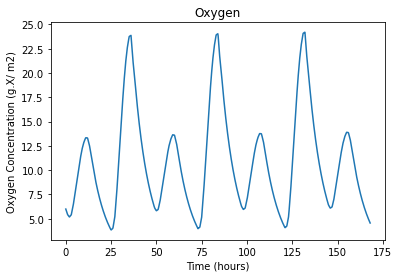

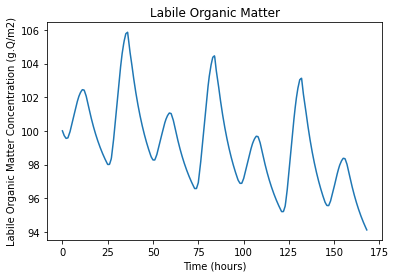

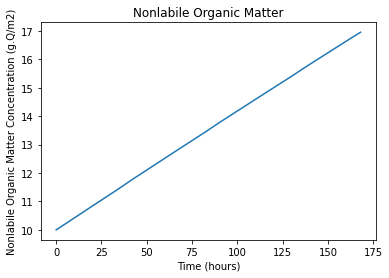

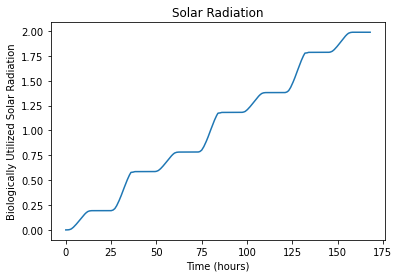

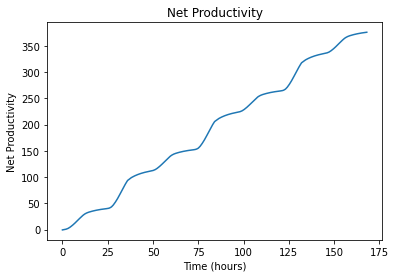

In [3]:
#CONTROL POND IN THE SUMMER

#Anna Andresen==========================================================================
#Ecosystem Modelling with the implementation of Odum's equations
#=======================================================================================
# OBJECTIVE:
#
# To test ecological engineering as a means to develop
# wastewater utilization
# To use less technology and more of
# the complexity of nature
# examined the oxygen dynamic ecosystem model Odum
# reated in 1968-1971 with ecological model.
#===============================================================================================================================
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt 
import math


insolation = [0, .3, .8, 1.6, 2.1, 2.3, 2.5, 2.6, 2.5, 2.3, 2.1, 1.6, .08, .3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#insulation array at 1 hour intervals // megajoules per square meter
windData= [6.5, 6.7, 7.0, 7.1, 7.3, 7.6, 8.1, 8.2, 8.3, 8.4, 8.4, 8.5, 8.4, 8.2, 8.0, 7.5, 7.3, 7.1, 6.9, 6.7, 6.5, 6.3, 6.1, 6.0, 6.5, 6.7, 7.0, 7.1, 7.3, 7.6, 8.1, 8.2, 8.3, 8.4, 8.4, 8.5, 8.4, 8.2, 8.0, 7.5, 7.3, 7.1, 6.9, 6.7, 6.5, 6.3, 6.1, 6.0, 6.5, 6.7, 7.0, 7.1, 7.3, 7.6, 8.1, 8.2, 8.3, 8.4, 8.4, 8.5, 8.4, 8.2, 8.0, 7.5, 7.3, 7.1, 6.9, 6.7, 6.5, 6.3, 6.1, 6.0, 6.5, 6.7, 7.0, 7.1, 7.3, 7.6, 8.1, 8.2, 8.3, 8.4, 8.4, 8.5, 8.4, 8.2, 8.0, 7.5, 7.3, 7.1, 6.9, 6.7, 6.5, 6.3, 6.1, 6.0, 6.5, 6.7, 7.0, 7.1, 7.3, 7.6, 8.1, 8.2, 8.3, 8.4, 8.4, 8.5, 8.4, 8.2, 8.0, 7.5, 7.3, 7.1, 6.9, 6.7, 6.5, 6.3, 6.1, 6.0, 6.5, 6.7, 7.0, 7.1, 7.3, 7.6, 8.1, 8.2, 8.3, 8.4, 8.4, 8.5, 8.4, 8.2, 8.0, 7.5, 7.3, 7.1, 6.9, 6.7, 6.5, 6.3, 6.1, 6.0, 6.5, 6.7, 7.0, 7.1, 7.3, 7.6, 8.1, 8.2, 8.3, 8.4, 8.4, 8.5, 8.4, 8.2, 8.0, 7.5, 7.3, 7.1, 6.9, 6.7, 6.5, 6.3, 6.1, 6.0, 6.5, 6.7, 7.0, 7.1, 7.3, 7.6, 8.1, 8.2, 8.3, 8.4, 8.4, 8.5, 8.4, 8.2, 8.0, 7.5, 7.3, 7.1, 6.9, 6.7, 6.5,]
#wind array, 1 hour time intervals miles per hour
solarData = [0, 0.15, 0.4, 0.8, 1.05, 1.15, 1.25, 1.3, 1.25, 1.15, 1.05, 0.8, 0.4, 0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, .3, .8, 1.6, 2.1, 2.3, 2.5, 2.6, 2.5, 2.3, 2.1, 1.6, .08, .3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.15, 0.4, 0.8, 1.05, 1.15, 1.25, 1.3, 1.25, 1.15, 1.05, 0.8, 0.4, 0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, .3, .8, 1.6, 2.1, 2.3, 2.5, 2.6, 2.5, 2.3, 2.1, 1.6, .08, .3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.15, 0.4, 0.8, 1.05, 1.15, 1.25, 1.3, 1.25, 1.15, 1.05, 0.8, 0.4, 0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, .3, .8, 1.6, 2.1, 2.3, 2.5, 2.6, 2.5, 2.3, 2.1, 1.6, .08, .3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.15, 0.4, 0.8, 1.05, 1.15, 1.25, 1.3, 1.25, 1.15, 1.05, 0.8, 0.4, 0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, .3, .8, 1.6, 2.1, 2.3, 2.5, 2.6, 2.5, 2.3, 2.1, 1.6, .08, .3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#solar info for the first three days cut in half and repeated it's how you calculate I: biologically utilized solar radiation varried by time

#====================================================
#   starting my model
#=====================================================
def odum_sim(x,t):
    #parameters
    J = 0 # = input nutrient mass (g.N/m2-day)
    JG = 0 #not physically described in the slideshow
    K0 = 19 #not physically described in slides
    K1 = 35 #coefficient translating solar radiation and nutrients to produce oxygen (g-x/g.N.m2/MJ)
    K2 = 14 #coefficient translating solar radiation and nutrients to produce oxygen (g-x/g.N.m2/MJ)
    K3 = 0.001 #coefficient for oxygen utilization in respiration of labileorganics (m2/g.Q-day)
    K4 = .0004 #coefficient for oxygen utilization in respiration of labile organics (m2/g.Q-day)
    K5 = .000022 #coefficient for production of nutrient as a result of labile organic degradation (m2-g.N/g.x-g.Q-day)
    K6 = .000833 #coefficient for nutrient flux out of the pond (1/day)
    K8 = .68 #coefficient for translating solar radiation and nutrients into uptake of nutrient (m2/MJ)
    K9 = .01 #not physically described in text
    L1 = .000166 #coefficient for exchange of dissolved oxygen with the atmosphere (g.X-day)
    L2 = .000417 #coefficient for transforming labile organic carbon to non-labile organic carbon (g.G/g.Q-day)
    XS = 6 #is saturation concentration of oxygen in water (g.x/m2)    

    N = x[0]
    X = x[1]
    Q = x[2]
    G = x[3]
    
    #making I
    i = int(math.floor(t)) #making the index to iterate through the list
    I = solarData[i]/(1 + (K0*N)) #biologically utilized solar radiation, varied by time, N is nutrient concentration (g.N/m2)
    
    #making K7
    j = int(math.floor(t)) #making the index to iterate through the list
    K7 = .01*windData[j] #k7 is coefficient for exchange of dissolved oxygen with theatmosphere (g.X-day)
    
    DN = J-(K8*I*N)-(K6*N)+(K5*X*Q)
    #where I = biologically utilized solar radiation, varied by time, N is nutrient concentration (g.N/m2)
        #X = oxygen concentration (g.X/ m2)
        #Q = labile organic matter concentration (g.G/ m2)
        #N= nutrient concentration (g-N/m2)
        #DN = the change in N
    
    DX = (K1*I*N)-(K3*X*Q)+K7*(1-(X/XS))
    #where DX is the change in oxygen concentration (g.X/m2/time)
    #Q = labile organic matter concentration (g.Q/m2)
    #X = oxygen concentration (g.X/m2)
    #N = nutrient concentration (g.N/m2)
    #I = biologically utilized solar radiation, varied by time,

    #DQ = JG-(K2*I*N)-(K4*X*Q)-(L1*Q)-(L2*Q)
    DQ = (K2*I*N)-(K4*X*Q)+JG-(L1*Q)-(L2*Q)
    #where DQ = the change in labile organic matter concentration
        #G = nonlabile organics
        #I = biologically utilized solar radiation, varied by time, N is nutrient concentration (g.N/m2)
        #N = nutrient concentration (g-N/m2)
        #Q = Q = labile organic matter concentration (g.G/ m2)
        #X = X = oxygen concentration (g.X/ m2)

    DG = L2*Q
    #where DG is the change in nonlabile organics
        #G = nonlabile organics
        #Q = labile organic matter concentration
        
    NetProductivity = K1*I*N + K3*Q*X #net productivity is difference between production and respiration

    return [DN, DX, DQ, DG, I, NetProductivity]

x0 = [3, 6, 100, 10, 0, -.6] #initial condition
t = np.linspace(0,168,1000) #creating 1000 points linearily spaced between 0 and 168

x = odeint(odum_sim, x0, t)
N = x[:,0]
X = x[:,1]
Q = x[:,2]
G = x[:,3]
I = x[:,4]
NetProductivity = x[:,5]

plt.plot(t,N)
plt.title('Nutrients')
plt.xlabel('Time (hours)')
plt.ylabel('Nutrient Concentration (g.N/m2)')
plt.show()

plt.plot(t,X)
plt.title('Oxygen')
plt.xlabel('Time (hours)')
plt.ylabel('Oxygen Concentration (g.X/ m2)')
plt.show()

plt.plot(t,Q)
plt.title('Labile Organic Matter')
plt.xlabel('Time (hours)')
plt.ylabel('Labile Organic Matter Concentration (g.Q/m2)')
plt.show()

plt.plot(t,G)
plt.title('Nonlabile Organic Matter')
plt.xlabel('Time (hours)')
plt.ylabel('Nonlabile Organic Matter Concentration (g.Q/m2)')
plt.show()

plt.plot(t,I)
plt.title('Solar Radiation')
plt.xlabel('Time (hours)')
plt.ylabel('Biologically Utilized Solar Radiation')
plt.show()

plt.plot(t,NetProductivity)
plt.title('Net Productivity')
plt.xlabel('Time (hours)')
plt.ylabel('Net Productivity')
plt.show()